In [3]:
import pandas as pd
df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [15]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

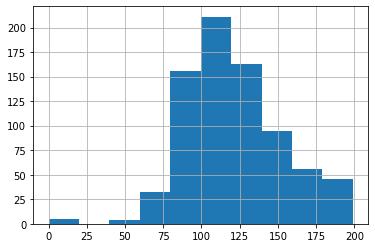

In [10]:
df['Glucose'].hist()

<AxesSubplot:>

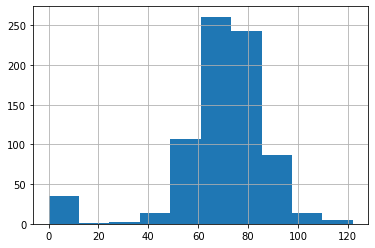

In [11]:
df['BloodPressure'].hist()

<AxesSubplot:>

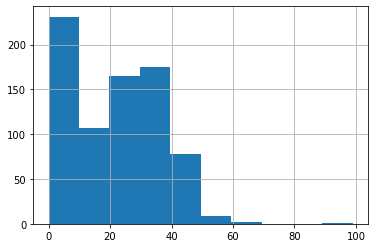

In [12]:
df['SkinThickness'].hist()

<AxesSubplot:xlabel='SkinThickness'>

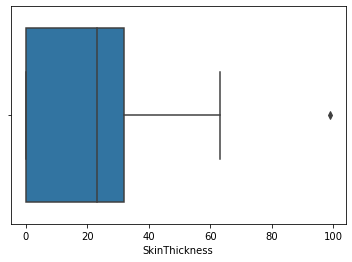

In [13]:
sns.boxplot(x = 'SkinThickness',data = df)

In [17]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:>

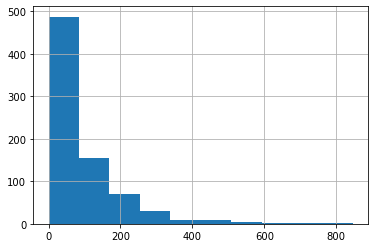

In [18]:
df['Insulin'].hist()

<AxesSubplot:>

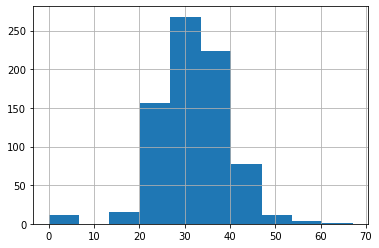

In [19]:
df['BMI'].hist()

C:\Users\pramo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Density'>

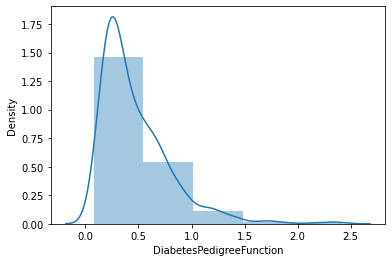

In [23]:
sns.distplot(a = df['DiabetesPedigreeFunction'],bins = 5  )

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='BloodPressure'>

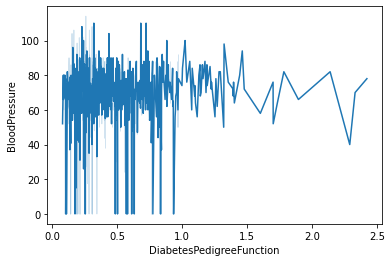

In [28]:
sns.lineplot(x = 'DiabetesPedigreeFunction' , y = 'BloodPressure' , data = df)

In [29]:
X = df.drop(columns = ['Outcome'],axis = 1)
y = df.Outcome

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 ,random_state = 0)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier


In [67]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [68]:
accuracy_score(y_test,y_predict)

0.7727272727272727

In [70]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       107
           1       0.61      0.70      0.65        47

    accuracy                           0.77       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.78      0.77      0.78       154



In [72]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [73]:
y = [[2,152,60,23,76,33.8,0.54,40]]

In [74]:
model.predict(y)

array([1], dtype=int64)

# Saving the training model

In [75]:
import pickle

In [77]:
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [78]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [79]:
loaded_model.predict(y)

array([1], dtype=int64)

In [81]:
import numpy as np
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic
